# Udacity’s Data Analyst Nanodegree - Project 2: Investigate the "Medical Appointment No Shows" Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report I will analyze the "Medical Appointment No shows" dataset, which consist of big set of appointments for patients in Brazil. The dataset covers some patients characteristics such as Age, gender, medical/health conditions, and most importantly it will show whether the patient showed up for the appointment or not. The show up column will be the dependent variable in this data analysis.
In this data analysis, I will find if younger patients tend to miss their appointments more. Also, I will find whether having a medical condition affects the show up rate.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load the data and print first 3 rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
#find the dimensions of the dataframe
df.shape

(110527, 14)

In [4]:
#find summary statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#find info of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#find duplicated data 
sum(df.duplicated())

0

#### Observations
* The dataset has 110,527 rows, and 14 columns.
* The dataset has no empty cells.
* The dataset has 0 duplicated rows.
* The summary stats shows the minimum value for Age is -1. This of course can't be right and need to be handled.
* Some column name need to be renamed to be consistent with other columns name.
* Few unneeded columns should be dropped.

### Data Preparation

In [7]:
#drop unneeded columns 
df.drop(['PatientId','AppointmentID','ScheduledDay','Neighbourhood','Scholarship','SMS_received'], axis=1, inplace=True)

>#### In the above cell, I have dropped the columns which will not be used in this analysis.

In [8]:
#fixing column names to be consistent, and fix some typos 
df.rename(columns={'AppointmentDay':'appointment_day','Hipertension':'hypertension',
                   'Handcap':'handicap','No-show': 'no_show'}, inplace=True)
#lowercase column names
df.rename(columns=lambda x: x.lower(), inplace=True)
#confirm new column names
df.head(1)

,gender,appointment_day,age,hypertension,diabetes,alcoholism,handicap,no_show
0,F,2016-04-29T00:00:00Z,62,1,0,0,0,No


>#### In the above cell, I have renamed the columns name:
* I used underscore to separate column names with two words.
* corrected some typos in the names.
* lowercase all column names.

In [9]:
#find number of rows with negative Age value
len(df[(df.age < 0)])

1

In [10]:
#only keep rows with non-negative age value
df = df[df.age >= 0]

>#### In the above cell, I found that there's only one row with negative age value.
* I modified the dataframe to only keep rows with non-negative age.

In [11]:
#handle no_show columns
df['no_show'] = np.where(df.no_show.values == 'Yes', 1, 0)

>#### In the above cell I used numpy to change cells with value of 'Yes' to 1, and value of 'No' to 0. I done that so I'm able to use the column for statistical analysis.

In [12]:
#create new column named 'has_condition'
df['has_condition'] = np.where(df.iloc[:, 3:7].sum(axis=1) > 0, 1,0)

In [13]:
#dropping the medical/health condition columns
df.drop(df.iloc[:, 3:7],axis=1,inplace=True)
#confirm changes
df.head(10)

,gender,appointment_day,age,no_show,has_condition
0,F,2016-04-29T00:00:00Z,62,0,1
1,M,2016-04-29T00:00:00Z,56,0,0
2,F,2016-04-29T00:00:00Z,62,0,0
3,F,2016-04-29T00:00:00Z,8,0,0
4,F,2016-04-29T00:00:00Z,56,0,1
5,F,2016-04-29T00:00:00Z,76,0,1
6,F,2016-04-29T00:00:00Z,23,1,0
7,F,2016-04-29T00:00:00Z,39,1,0
8,F,2016-04-29T00:00:00Z,21,0,0
9,F,2016-04-29T00:00:00Z,19,0,0


>#### In the above cells I manipulate the columns where it states if the patient has a specifc medical/health conditions. As follow: 
* I created new column named 'has_condition', which will have a value of either 1 or 0:
if the patient has at least one medical/health condition, the 'has_condition' value would be 1 (Otherwise the value will be 0).
* Then I dropped the columns with the specific kind of condition, because it's not relevant for my analysis.

<a id='eda'></a>
## Exploratory Data Analysis



#### First let's get an overview about whether patients in this dataset tend to show up for their appointments or not.

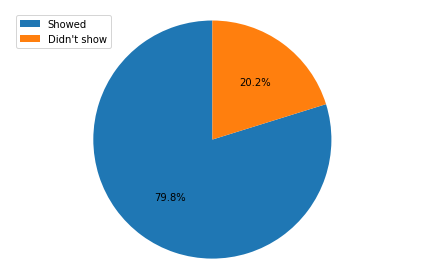

In [14]:
labels = ['Showed', 'Didn\'t show']
sizes = df.no_show.value_counts()[0],df.no_show.value_counts()[1]
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

> Good to know! 79.8% of the time, the patient showed up for his/her appointments. Now let's dig deeper into this data.

### Research Question 1: Is a young person more likely to miss an appointment compared to elderly person?

In [15]:
#creating masks for rows where the patient showed up, and didn't show up
show = df.no_show == 0
didnt_show = df.no_show == 1

In [16]:
print('The average age of patients who showed up for their appointment:',round(df.age[show].mean()))
print('The average age of patients who didn\'t show up for their appointment:',round(df.age[didnt_show].mean()))

The average age of patients who showed up for their appointment: 38.0
The average age of patients who didn't show up for their appointment: 34.0


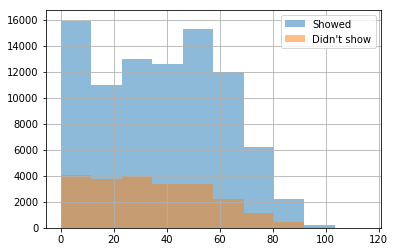

In [17]:
df.age[show].hist(alpha=0.5, label='Showed')
df.age[didnt_show].hist(alpha=0.5, label='Didn\'t show')
plt.title('Frequency of Appointments Show Up/No Show Up Per Age')plt.xlabel('Age')plt.ylabel('Frequency')plt.legend();

> Above stats/graph shows that young people tend to miss their appointment more than elderly people.

### Research Question 2: Is a patient who has a medical/health condition is more likely to show up for his/her appointment?

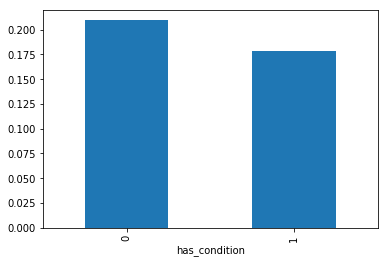

In [18]:
df.groupby('has_condition').no_show.mean().plot(kind='bar');

In [19]:
print('Patients without medical condition missed',"%.2f" % (df.groupby('has_condition').no_show.mean()[0]*100),'% of their appointments.')
print('Patients with medical condition missed',"%.2f" % (df.groupby('has_condition').no_show.mean()[1]*100),'% of their appointments.')

Patients without medical condition missed 20.93 % of their appointments.
Patients with medical condition missed 17.86 % of their appointments.


> Patients with a medical condition are more likely to show up for the appointment.

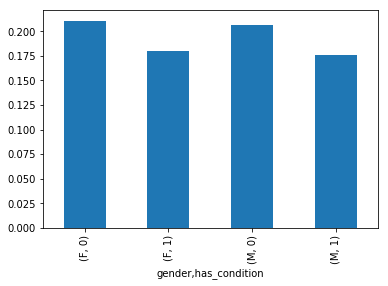

In [20]:
# let's look more into it with regard to Gender
df.groupby(['gender','has_condition']).no_show.mean().plot(kind='bar');

> It's the same for both genders. Patients with medical condition are more likely to show up for the appointment compared to patients without a medical condition.

In [21]:
#find missed appointments rate for patients with medical condition based on gender type
for i in df.gender.unique():
    appts_with_cond_g = len(df[(df['has_condition'] == 1) & (df['gender'] == i)])
    missed_appts_with_cond_g = len(df[(df['has_condition'] == 1) & (df['gender'] == i) & (df['no_show'] == 1)])
    missed_ratio_cond_g = missed_appts_with_cond_g/appts_with_cond_g*100
    print('Out of {} appointments made by {} patients with medical condition, {} were missed ({:.2f}%).'.format(appts_with_cond_g,i, missed_appts_with_cond_g, missed_ratio_cond_g))

Out of 17652 appointments made by F patients with medical condition, 3177 were missed (18.00%).
Out of 8760 appointments made by M patients with medical condition, 1539 were missed (17.57%).


> The miss rate for Female and Male patients with medical condition is fairly similar.

### Research Question 3: Which day of the week patients are more likely to miss their appointments?

In [22]:
#change 'appointment_day' column to datetime datatype 
df.appointment_day = pd.to_datetime(df.appointment_day)
#creating new column named 'day' which display the name of day of the week for the appointments
df['day'] = df.appointment_day.dt.day_name()

In [23]:
#find the missed appointments rate for each day of the week
for i in df.day.unique():
    appts_on_day = len(df[(df['day'] == i)])
    appts_missed_on_day = len(df[(df['day'] == i) & (df['no_show'] == 1)])
    missed_ratio_on_day = appts_missed_on_day/appts_on_day*100
    print('Out of {} appointments on {}, {} were missed ({:.2f}%)'.format(appts_on_day,i,appts_missed_on_day,missed_ratio_on_day))

Out of 19019 appointments on Friday, 4037 were missed (21.23%)
Out of 25640 appointments on Tuesday, 5152 were missed (20.09%)
Out of 22714 appointments on Monday, 4690 were missed (20.65%)
Out of 25867 appointments on Wednesday, 5093 were missed (19.69%)
Out of 17247 appointments on Thursday, 3338 were missed (19.35%)
Out of 39 appointments on Saturday, 9 were missed (23.08%)


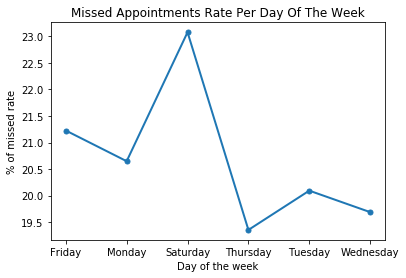

In [24]:
plt.plot(df.groupby('day').no_show.mean()*100,linewidth=2,marker='o',markersize=5)
plt.title('Missed Appointments Rate Per Day Of The Week')
plt.xlabel('Day of the week')
plt.ylabel('% of missed rate')
plt.show()

> Patients are more likely to miss their appointments on Friday & Saturday.

<a id='conclusions'></a>
## Conclusions


General overview of the dataset showed that almost 80% of the patients did show up for their appointments. The results to answer the first research question showed that younger patients are more likely to miss their appointments (Average age of patients who missed their appointments is 34 years old, and the average age of patients who showed up for their appointments is 38 years old).

The results to answer the second research question showed that patients with a medical/health condition are more likely to show up for the appointment. Moreover, when looking into it from gender perspective, data showed minimal difference between the two genders. Female patients with medical condition missed 18% of their appointments, while the appointments miss rate for Male patients with medical condition is 17.57%.

The results to answer the third research question showed that patients miss more appointments on Saturday, as 23% of the appointments on Saturday were missed. Additionally, the data showed that patients are less likely to miss the appointments during midweek.

Seeing that the dataset didn't have empty cells, or duplicated rows, it's safe to say the dataset didn't have much limitations. My only concern was the "Age" column, because one row had a negative age value. Also, some rows have 0 age value, which could mean that the patients is less than a year old, or simply the actual age is missing!.